### Objective- To analysis which variable is the reason for attrition of a Company.

#### Importing the necessary library

In [94]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [95]:
#importing the necessary dataset.
dataset= pd.read_csv("Attrition_Rate.csv")
dataset.head(10)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,1,6,Female,...,3.0,Y,13,8,0,28.0,5,7,7,7
6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,...,2.0,Y,20,8,1,5.0,2,0,0,0
7,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,1,8,Male,...,2.0,Y,22,8,3,10.0,2,0,0,0
8,31,No,Travel_Rarely,Research & Development,1,3,Life Sciences,1,9,Male,...,0.0,Y,21,8,0,10.0,2,9,7,8
9,25,No,Non-Travel,Research & Development,7,4,Medical,1,10,Female,...,1.0,Y,13,8,1,6.0,2,6,1,5


In [96]:
dataset.shape

(4410, 24)

In [97]:
dataset.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [98]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [99]:
dataset.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


**Inteperation:**
1. The dataset contains **4410 observation and 24 variable**
2. **Attrition, BusinessTravel, Department, Educationfield,Gender, JobRole and MaritalStatus** are the **categoraical variable** hence can be converted to level.
3. The variable **StandardHours, EmployeeCount,EmployeeID and Over18** is the same for all, hence can be **dropped.**
4. only **NumCompaniesWorked** has 19 missing values.

In [100]:
#printing column name
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [101]:
#Dropping the column StandarHour
dataset.drop("StandardHours", axis=1, inplace=True)
dataset.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,131160,1.0,Y,11,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,41890,0.0,Y,23,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,193280,1.0,Y,15,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,83210,3.0,Y,11,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,23420,4.0,Y,12,2,9.0,2,6,0,4


In [102]:
#Droppimg the Over18 Column
dataset.drop("Over18", axis=1,inplace=True)
dataset.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,Married,131160,1.0,11,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,Single,41890,0.0,23,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,Married,193280,1.0,15,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,Married,83210,3.0,11,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,Single,23420,4.0,12,2,9.0,2,6,0,4


In [103]:
#Dropping the EmployeeCount Column
dataset.drop("EmployeeCount", axis=1, inplace=True)
dataset.head(2)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,Married,131160,1.0,11,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,...,Single,41890,0.0,23,1,6.0,3,5,1,4


In [104]:
#Dropping The EmployeeID Column
dataset.drop("EmployeeID", axis=1, inplace=True)
dataset.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4


In [105]:
#counting the number of labels present in each categorical type
dataset['Attrition'].value_counts()

No     3699
Yes     711
Name: Attrition, dtype: int64

Hence, Attrition is a **binary** categorical variable

In [106]:
dataset["BusinessTravel"].value_counts()

Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: BusinessTravel, dtype: int64

Hence, BusinessTravel has got **three labels**: Travel_Rarely,Travel_Frequently,Non-Travel 

In [107]:
dataset["Department"].value_counts()

Research & Development    2883
Sales                     1338
Human Resources            189
Name: Department, dtype: int64

Hence, Department is of **three type**: Research & Development,Sales, Human Resources

In [108]:
dataset['EducationField'].value_counts()

Life Sciences       1818
Medical             1392
Marketing            477
Technical Degree     396
Other                246
Human Resources       81
Name: EducationField, dtype: int64

Hence, EducationField has got **six** label: Life Science, Medical, Marketing, Technical Degree, Others, Human Resources.

In [109]:
dataset['Gender'].value_counts()

Male      2646
Female    1764
Name: Gender, dtype: int64

Gender is a **binary** categoraical

In [110]:
dataset["MaritalStatus"].value_counts()

Married     2019
Single      1410
Divorced     981
Name: MaritalStatus, dtype: int64

MaritalStatus has got **three** labels: Married,Single,Divorced

In [111]:
dataset["JobRole"].value_counts()

Sales Executive              978
Research Scientist           876
Laboratory Technician        777
Manufacturing Director       435
Healthcare Representative    393
Manager                      306
Sales Representative         249
Research Director            240
Human Resources              156
Name: JobRole, dtype: int64

In JobRole the dataset contains **NINE** distinct labels.

In [112]:
#Changing the dataset to required type i.e categoraical variables to numericfro and dropping the Standardhour colounm
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
dataset['Attrition']=le.fit_transform(dataset["Attrition"])
dataset["BusinessTravel"]= le.fit_transform(dataset["BusinessTravel"])
dataset["EducationField"]= le.fit_transform(dataset["EducationField"])
dataset["Gender"]= le.fit_transform(dataset["Gender"])
dataset["Department"] =le.fit_transform(dataset["Department"])
dataset["MaritalStatus"]=le.fit_transform(dataset["MaritalStatus"])
dataset["JobRole"]=le.fit_transform(dataset["JobRole"])
dataset.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4


In [113]:
#replacing null value of NumofcomapniesWorked Column with the median value
dataset.fillna(dataset.median(),inplace=True)

In [114]:
#Checking the presence of any null value
dataset.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [115]:
dataset.shape

(4410, 20)

**Interperation:**
   1. All the Categorical varibales are converted to numeric.
   2. Varibles like **StandardHours and Over18** are **dropped** as had same value input.
   3. Shape of the dataset is **4410** observation  and **20** Variables
   4. Null values are replaced by the **median**
    

### Performing Exploratory Data Analysis 

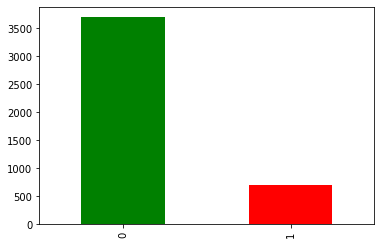

In [116]:
dataset.Attrition.value_counts().plot(kind="bar", color=['green','red'])
plt.show()

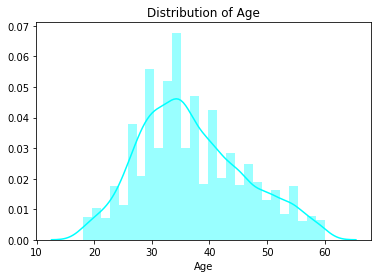

In [117]:
# Plotting AGE Varible to see the data distribution
sn.distplot(dataset["Age"], color='cyan')
plt.title("Distribution of Age")
plt.show();

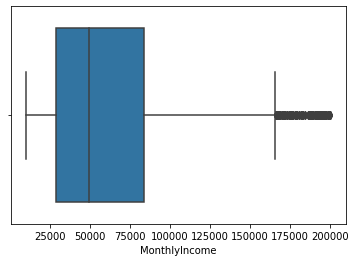

In [118]:
sn.boxplot(dataset["MonthlyIncome"])
plt.show()

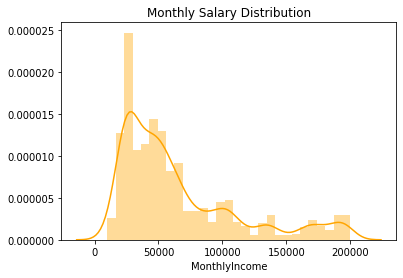

In [119]:
sn.distplot(dataset["MonthlyIncome"],color="Orange")
plt.title("Monthly Salary Distribution")
plt.show()

The data is **right skewed** i.e most of the employees fall within the salary range of approximately 12,500 to 65,000

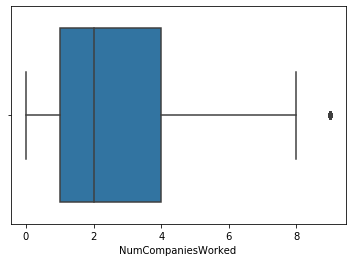

In [120]:
sn.boxplot(dataset["NumCompaniesWorked"])
plt.show()

The NumCompaniesWorked data is kind of **right skewed** with only one **Outlier**

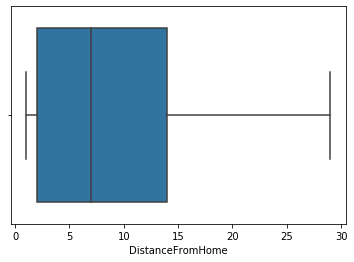

In [121]:
sn.boxplot(dataset["DistanceFromHome"])
plt.show();

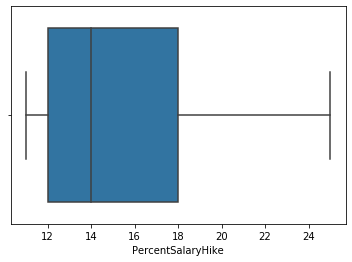

In [122]:
sn.boxplot(dataset['PercentSalaryHike'])
plt.show();

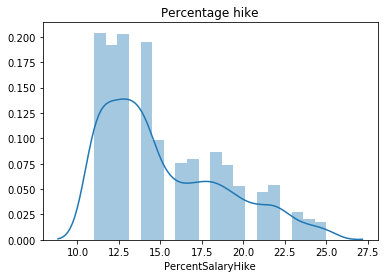

In [123]:
sn.distplot(dataset["PercentSalaryHike"])
plt.title("Percentage hike")
plt.show()

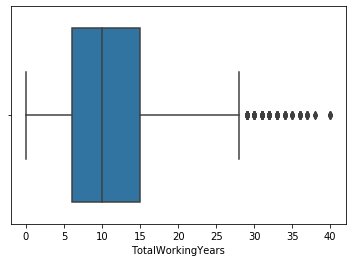

In [124]:
sn.boxplot(dataset["TotalWorkingYears"])
plt.show();

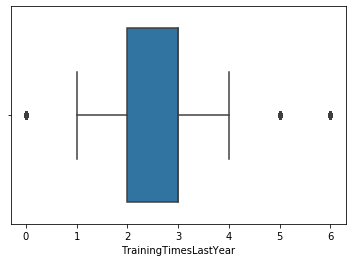

In [125]:
sn.boxplot(dataset["TrainingTimesLastYear"])
plt.show();

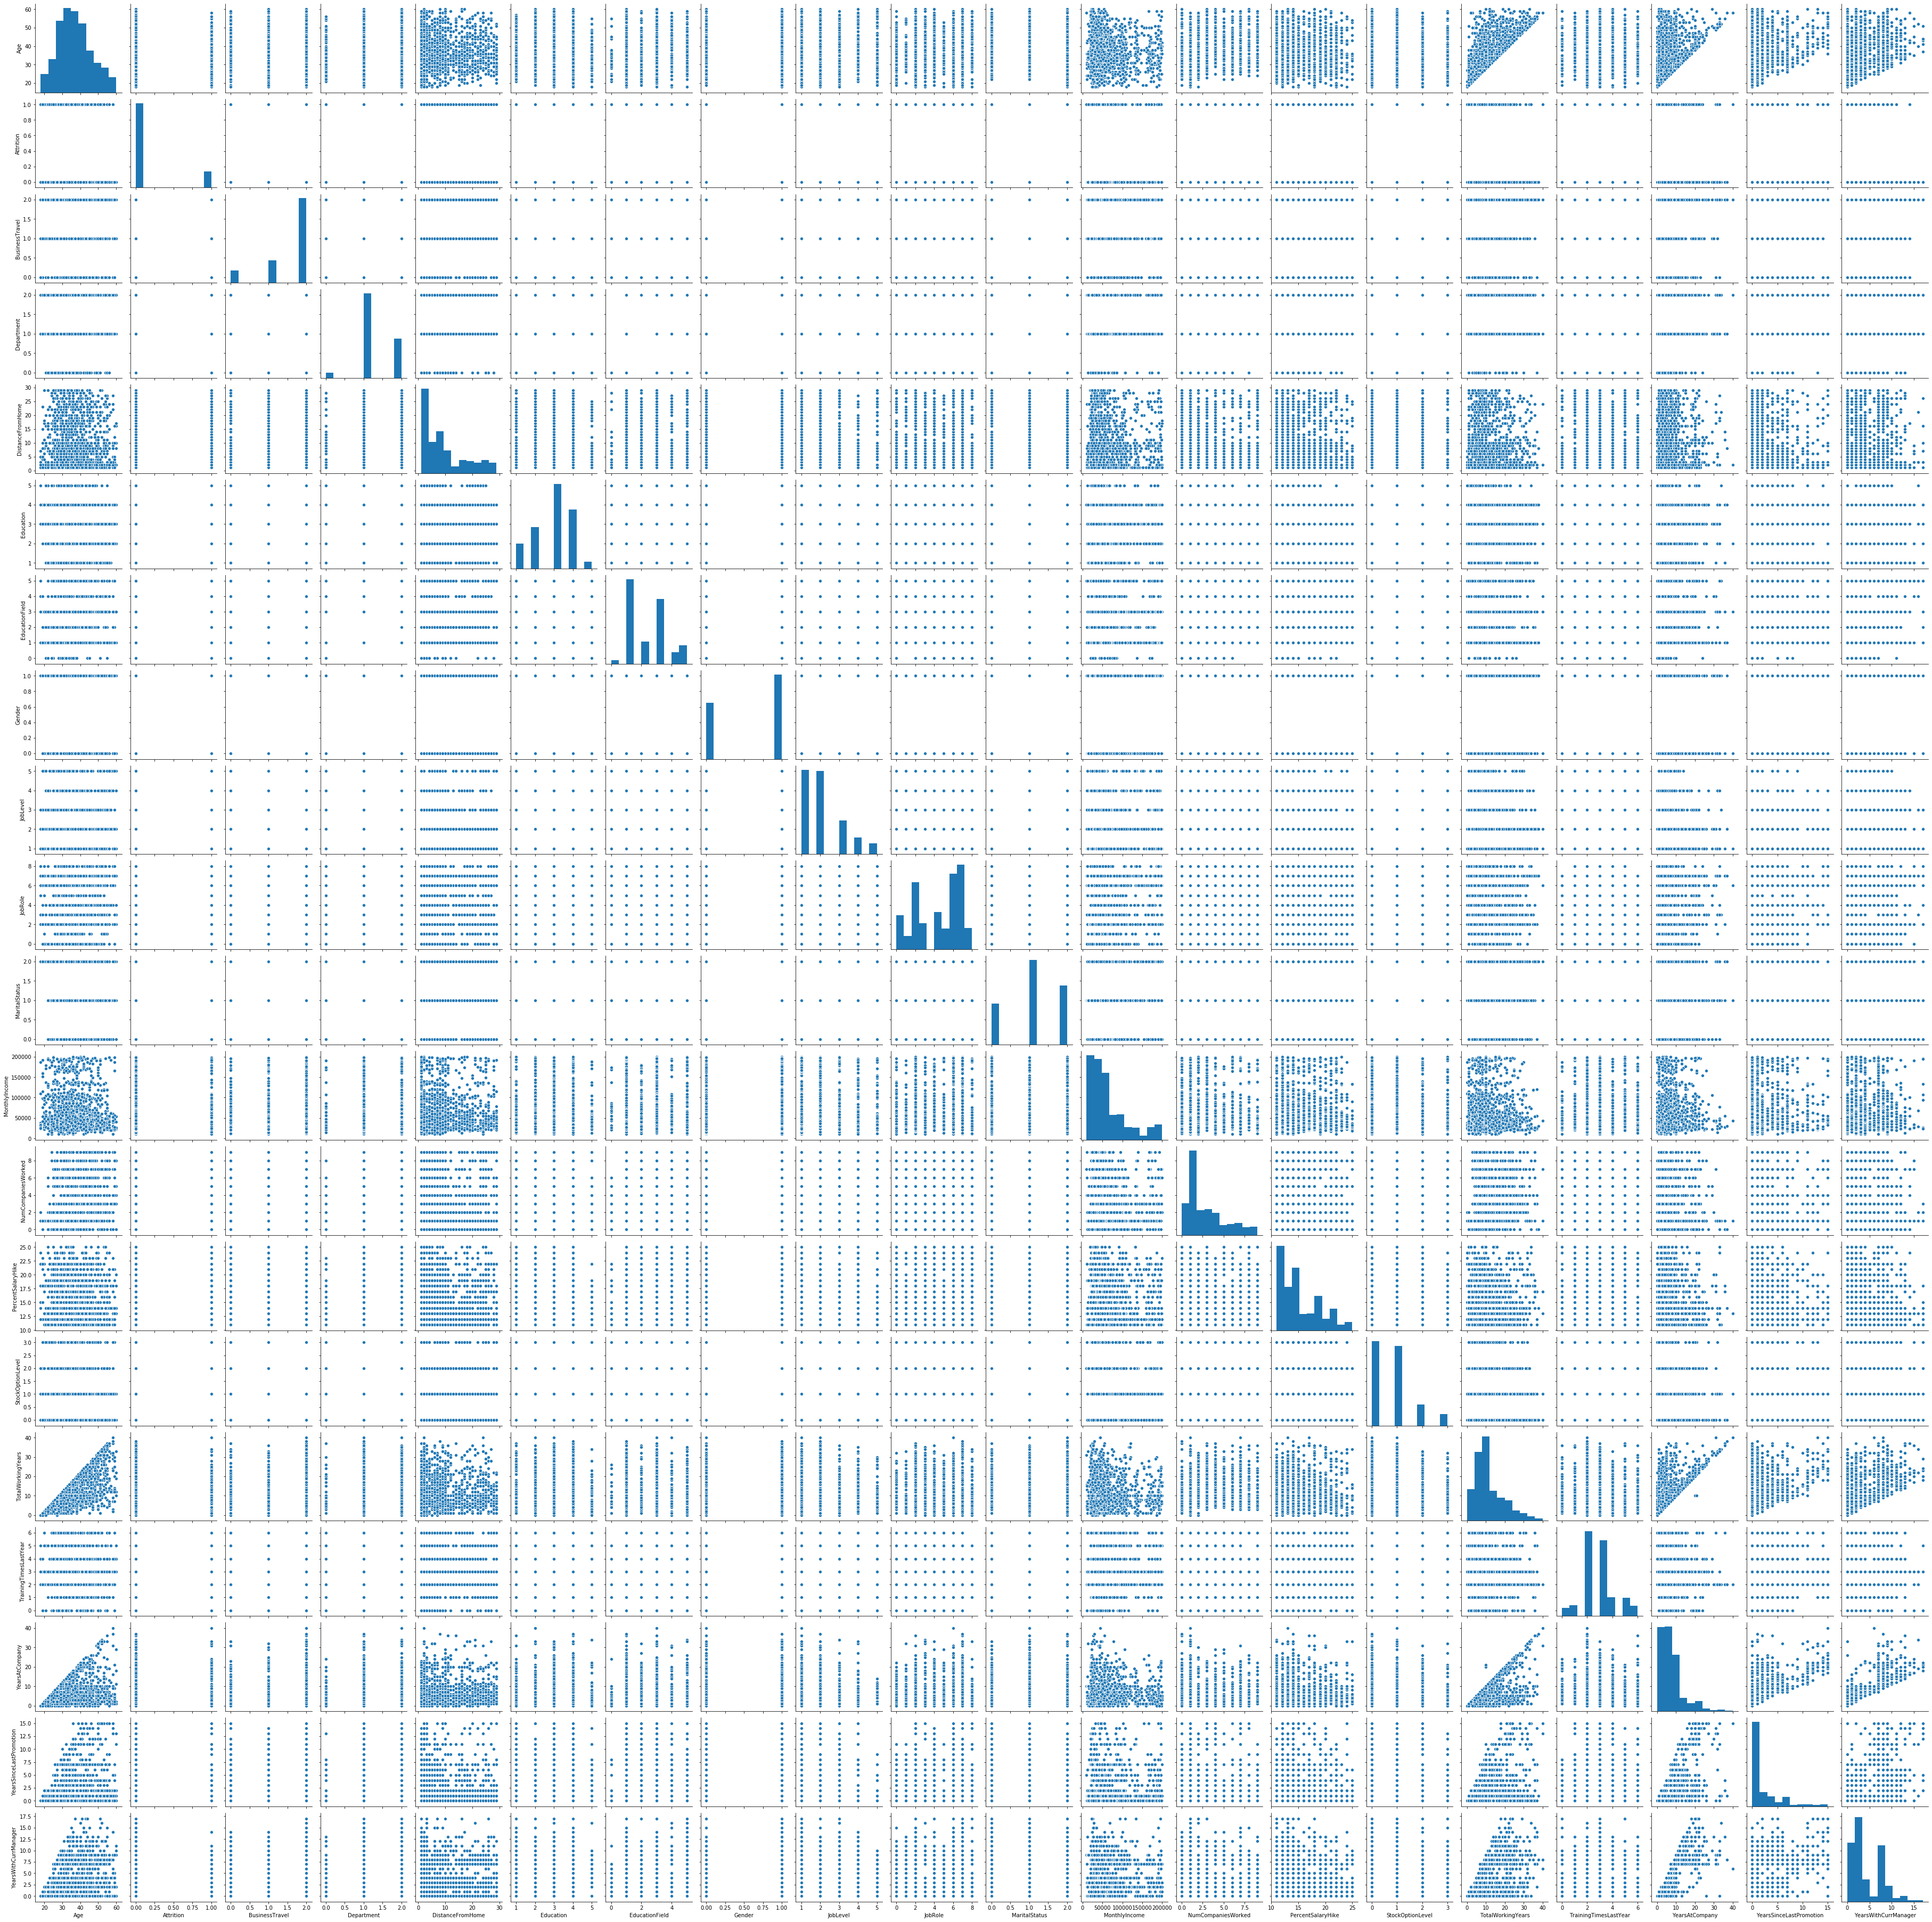

In [126]:
#Plotting PAIR PLOT
sn.pairplot(dataset)
plt.show();

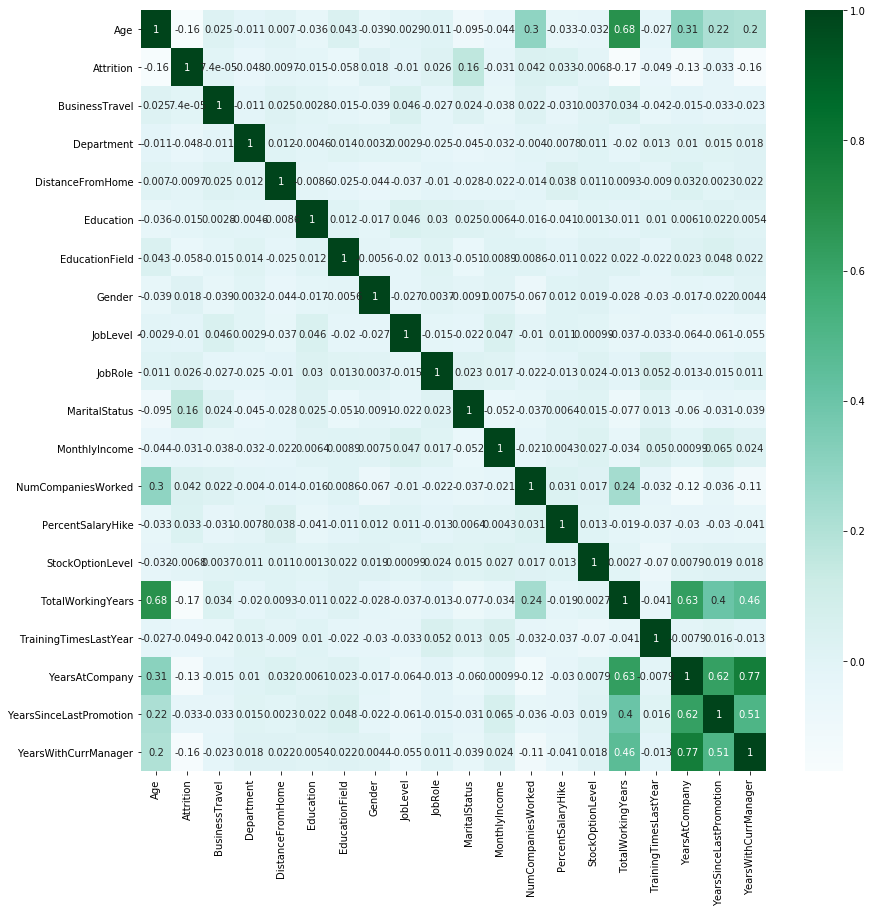

In [127]:
#Getting correlation of every variable
Corrmat=dataset.corr()
top_feature=Corrmat.index
plt.figure(figsize=(14,14))
#plotting HeatMap
g=sn.heatmap(dataset[top_feature].corr(), annot=True,cmap= "BuGn")


In [128]:
#CrossTable to see Varibale WRT ATTRITION Variable
pd.crosstab(dataset['Attrition'],dataset['Gender'])

Gender,0,1
Attrition,,
0,1494,2205
1,270,441


In [129]:
pd.crosstab(dataset['Attrition'],dataset['Education'])

Education,1,2,3,4,5
Attrition,,,,,
0,432,687,1449,1008,123
1,78,159,267,186,21


In [130]:
pd.crosstab(dataset['Attrition'],dataset['JobLevel'])

JobLevel,1,2,3,4,5
Attrition,,,,,
0,1377,1317,558,267,180
1,252,285,96,51,27


In [131]:
pd.crosstab(dataset['Attrition'],dataset['NumCompaniesWorked'])

NumCompaniesWorked,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
Attrition,,,,,,,,,,
0,517,1265,405,426,365,141,160,171,129,120
1,69,293,52,48,50,46,48,51,18,36


In [132]:
pd.crosstab(dataset['Attrition'],dataset['PercentSalaryHike'])

PercentSalaryHike,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
Attrition,,,,,,,,,,,,,,,
0,540,504,525,516,240,204,201,228,186,138,117,138,69,54,39
1,90,90,102,87,63,30,45,39,42,27,27,30,15,9,15


In [133]:
pd.crosstab(dataset['Attrition'],dataset['TrainingTimesLastYear'])

TrainingTimesLastYear,0,1,2,3,4,5,6
Attrition,,,,,,,
0,132,183,1359,1215,321,306,183
1,30,30,282,258,48,51,12


In [134]:
pd.crosstab(dataset['Attrition'],dataset['YearsAtCompany'])

YearsAtCompany,0,1,2,3,4,5,6,7,8,9,...,27,29,30,31,32,33,34,36,37,40
Attrition,,,,,,,,,,,,,,,,,,,,,
0,84,336,300,324,273,525,201,237,213,222,...,6,6,3,6,6,12,3,6,3,0
1,48,177,81,60,57,63,27,33,27,24,...,0,0,0,3,3,3,0,0,0,3


In [135]:
pd.crosstab(dataset['Attrition'],dataset['YearsSinceLastPromotion'])

YearsSinceLastPromotion,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Attrition,,,,,,,,,,,,,,,,
0,1413,924,396,129,168,129,78,180,54,39,15,66,30,24,24,30
1,330,147,81,27,15,6,18,48,0,12,3,6,0,6,3,9


In [136]:
pd.crosstab(dataset['Attrition'],dataset['YearsWithCurrManager'])

YearsWithCurrManager,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Attrition,,,,,,,,,,,,,,,,,,
0,534,195,882,369,261,81,75,555,291,174,72,63,54,42,9,15,6,21
1,255,33,150,57,33,12,12,93,30,18,9,3,0,0,6,0,0,0


**Interpertation:**
1. It can be seen that attrition is higher in case if male i,e. **441** out of total attrition of **711**
2. Maximun attrition is happening with the employees who have already worked for a year. i.e. **293**
3. People who have got less than **15%** salary hike are found to leave the orgainzation
4. People with less than 4 Training Times Last Year have left the organization.
5. Maximun attrition is from the new joinies who have not been associated with the orgainzation for not more than 4 year

### For this Analysis here have built Logistic Regression Model of ML.

In [137]:
#Splitting the DataSet
y=dataset.iloc[:,1:2]
y.head()

,Attrition
0,0
1,1
2,0
3,0
4,0


In [138]:
x=dataset.drop(['Attrition'], axis=1)
x.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
2,32,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5
4,32,2,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4


In [144]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=5)
#Logistic Regression

from sklearn.linear_model import LogisticRegression
Logreg= LogisticRegression()
model=Logreg.fit(x_train,y_train)
y_pred=Logreg.predict(x_test)


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [145]:
#for checking the model accuracy
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [146]:
#Evaulting the model
accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy of the model is", accuracy)
Confusionmat=confusion_matrix(y_test,y_pred)
print("Confusion Martix")
print(Confusionmat)


Accuracy of the model is 84.6938775510204
Confusion Martix
[[747   1]
 [134   0]]


In [147]:
#Building OSL model
import statsmodels.api as sm
x1=sm.add_constant(x)
logistic=sm.Logit(y,x1)
result=logistic.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.393019
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 4410
Model:                          Logit   Df Residuals:                     4390
Method:                           MLE   Df Model:                           19
Date:                Thu, 22 Oct 2020   Pseudo R-squ.:                  0.1102
Time:                        21:16:06   Log-Likelihood:                -1733.2
converged:                       True   LL-Null:                       -1947.9
Covariance Type:            nonrobust   LLR p-value:                 3.423e-79
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0764      0.414      0.185      0.853      -0.734       0.887
Age                        -0.0309      0.007     -4.522      0.000      -0.044      -0.018
BusinessTravel             -0.0177      0.065     -0.270      0.787      -0.146       0.111
Department                 -0.2422      0.081     -2.980      0.003      -0.401      -0.083
DistanceFromHome           -0.0013      0.005     -0.247      0.805      -0.012       0.009
Education                  -0.0627      0.043     -1.472      0.141      -0.146       0.021
EducationField             -0.0965      0.033     -2.892      0.004      -0.162      -0.031
Gender                      0.0861      0.090      0.962      0.336      -0.089       0.262
JobLevel                   -0.0239      0.040     -0.604      0.546      -0.102       0.054
JobRole                     0.0377      0.018      2.109      0.035       0.003       0.073
MaritalStatus               0.5886      0.063      9.321      0.000       0.465       0.712
MonthlyIncome           -1.876e-06   9.56e-07     -1.962      0.050   -3.75e-06   -2.41e-09
NumCompaniesWorked          0.1162      0.018      6.330      0.000       0.080       0.152
PercentSalaryHike           0.0118      0.012      1.003      0.316      -0.011       0.035
StockOptionLevel           -0.0640      0.052     -1.239      0.216      -0.165       0.037
TotalWorkingYears          -0.0574      0.012     -4.826      0.000      -0.081      -0.034
TrainingTimesLastYear      -0.1467      0.035     -4.173      0.000      -0.216      -0.078
YearsAtCompany              0.0120      0.018      0.656      0.512      -0.024       0.048
YearsSinceLastPromotion     0.1322      0.020      6.459      0.000       0.092       0.172
YearsWithCurrManager       -0.1395      0.022     -6.307      0.000      -0.183      -0.096
===========================================================================================
"""

**Inference**
1. The variable with p value less than 0.05 shows having higher influence in attrition of employee, here the variables are **Age, Department, EducationField, Jobrole, MaritalStatus, MonthlyIncome, NumCompaniesWorked, TotalWorkingYears, TrainingTimesLastYear, YearssincelastPromotion, YearsWithCurrManager** has impacted on the attrition.
2. The Logistic Equation is **Attrition=0.0764+(-0.0309)Age+(-0.0177)BusinessTravel+(-0.02422)Department+(-0.0013)DistanceFromHome+(-0.067)Education+(-0.0965)EducationField+0.0861Gender+(-0.0239)Joblevel+0.0377JobRole+0.5886MaritalStatus+(-1.876e)MonthlyIncome+0.0118PercentSalaryHike+0.1162NumCompaniesWorked+(-0.0640)StockOptionLevel)+(-0.0574)TotalWorkingYears+(-0.1467)TrainingTimesLastYear+(0.0120)YearsAtCompany+(0.1322)YearsSinceLastPromotions+(-0.1395)YearsWithCurrManager**
 
3. Out of all these variables, namely **Age, MaritalStatus, NumCompaniesWorked, TotalWorkingYears, TrainingTimesLastYear,YearsSinceLastPromotion and YearsWithCurrManager are most significant.** 